# Data Manipulation and Joining with dplyr
## -- DataCamp - Data Analyst Career Track - Course 3 - 4 --

 **Note**
 This Notebook contains information from two Datacamp courses:
 - Data Manipulation with dplyr
 - Joining with dplyr
 
 To use this code, select the R environment in Anaconda
 
 **Used packages**
 - tidyverse
 - stringr
 
**Table of content**
- [&nbsp;&nbsp;1. Simple data wrangling ](#toc_54826_1)
- [&nbsp;&nbsp;2. Aggregating Data](#toc_54826_2)
- [&nbsp;&nbsp;3. Advanced selection techniques](#toc_54826_3)
- [&nbsp;&nbsp;4. Advanced filtering techniques](#toc_54826_4)
- [&nbsp;&nbsp;5. Advanced variable manipulation](#toc_54826_5)
- [&nbsp;&nbsp;6. Joining data](#toc_54826_6)
    - [&nbsp;&nbsp;6.1 bind_rows](#toc_54826_6.1)
    - [&nbsp;&nbsp;6.2 inner_join](#toc_54826_6.2)
    - [&nbsp;&nbsp;6.3 left_join](#toc_54826_6.3)
    - [&nbsp;&nbsp;6.4 right_join](#toc_54826_6.4)
    - [&nbsp;&nbsp;6.5 full_join](#toc_54826_6.5)
    - [&nbsp;&nbsp;6.6 semi_join](#toc_54826_6.6)
    - [&nbsp;&nbsp;6.7 anti_join](#toc_54826_6.7)
    - [&nbsp;&nbsp;6.8 Joining tables to themselves](#toc_54826_6.8)
    - [&nbsp;&nbsp;6.8 Visualizing set differences](#toc_54826_6.9)
- [&nbsp;&nbsp;7. magrittr pipeable operator replacements](#toc_54826_7)

**Set environment and plot size**

In [2]:
suppressMessages(library(tidyverse))
suppressMessages(library(stringr))
options(repr.plot.width=6, repr.plot.height=6)
theme_set(theme_grey(base_size =10))

Note: if the above code return an error message:
- Check that the correct R environment is selected in Anaconda
- Restart computer


**Import data**

In [6]:
baby <- readRDS("data/babynames.rds")
usa <- readRDS("data/counties.rds")

<a name="toc_54826_1"></a>
## 1.   Simple data wrangling 

Most common dplyr verbs: 
- `select()` 
- `filter()`
- `mutate()`
- `arrange()`

In [42]:
# 
usafilt <- usa %>%
  select(state, county, population, unemployment) %>%
  filter(state == "New York", unemployment < 6)  %>%
  mutate(unemployed_pop = population * unemployment / 100)  %>%
  arrange(desc(population))

usafilt

state,county,population,unemployment,unemployed_pop
<chr>,<chr>,<dbl>,<dbl>,<dbl>
New York,Tompkins,103855,5.9,6127.445
New York,Chemung,88267,5.4,4766.418
New York,Madison,72427,5.1,3693.777
New York,Livingston,64801,5.4,3499.254
New York,Seneca,35144,5.5,1932.920


In [43]:
# More filtering:
usafilt %>%
 filter(county != "Madison", population > 64801)  # also, when using !=, use | instead of & if needed

usa %>%
 select(state, county, population, unemployment) %>%
 filter(state %in% c("New York", "Washington"), unemployment < 5.5)

state,county,population,unemployment,unemployed_pop
<chr>,<chr>,<dbl>,<dbl>,<dbl>
New York,Tompkins,103855,5.9,6127.445
New York,Chemung,88267,5.4,4766.418


state,county,population,unemployment
<chr>,<chr>,<dbl>,<dbl>
New York,Chemung,88267,5.4
New York,Livingston,64801,5.4
New York,Madison,72427,5.1
Washington,Lincoln,10363,4.8


<a name="toc_54826_2"></a>
## 2.   Aggregating data

Usefult verbs:
- `count()` - we can add `sort` and `weigh` arguments
- `group_by()`
- `summarize()` 
    - arguments: `sum()`,`mean()`,`median()`,`min()`,`max()`,`n()`
- `slice_min()`, `slice_max()`, `slice_head()`, `slice_tail()` - extracts the most extreme observations
- `distinct()` - Select distinct/unique rows

In [47]:
usa  %>%
  count(state, sort = TRUE) %>%
  head()

state,n
<chr>,<int>
Texas,253
Georgia,159
Virginia,133
Kentucky,120
Missouri,115
Kansas,105


In [50]:
usa  %>%
  count(state, wt = population, sort = TRUE) %>%
  head()

state,n
<chr>,<dbl>
California,38421464
Texas,26538497
New York,19673174
Florida,19645772
Illinois,12873761
Pennsylvania,12779559


☝️ Using weights, now instead of seeing the number of counties in each state, we see the total population (same as summing population by state)

In [56]:
usa  %>%
  group_by(state, metro) %>%
  summarize(total_pop = sum(population),
            avg_pop = mean(population)) %>%
  head()

`summarise()` has grouped output by 'state'. You can override using the
`.groups` argument.


state,metro,total_pop,avg_pop
<chr>,<chr>,<dbl>,<dbl>
Alabama,Metro,3671377,126599.21
Alabama,Nonmetro,1159243,30506.39
Alaska,Metro,494990,164996.67
Alaska,Nonmetro,230471,9218.84
Arizona,Metro,6295145,786893.12
Arizona,Nonmetro,346783,49540.43


In [265]:
# Mutate() can also be used together with group_by()
baby %>%
  group_by(year) %>%
  mutate(year_total = sum(number)) %>%
  ungroup() %>% # we are done with the grouping
  mutate(fraction = number / year_total) %>%
  head(3)

year,name,number,year_total,fraction
<dbl>,<chr>,<int>,<int>,<dbl>
1880,Aaron,102,201478,5.062587e-04
1880,Ab,5,201478,2.481661e-05
1880,Abbie,71,201478,3.523958e-04


In [69]:
# Return the counties with the highest population in its state
usa  %>%
  select(state, county, population, unemployment) %>%
  group_by(state) %>%
  slice_max(population, n = 1)  %>% # n is the number of observations to be extracted for each group
  head()  

state,county,population,unemployment
<chr>,<chr>,<dbl>,<dbl>
Alabama,Jefferson,659026,9.1
Alaska,Anchorage Municipality,299107,6.7
Arizona,Maricopa,4018143,7.7
Arkansas,Pulaski,390463,7.5
California,Los Angeles,10038388,10.0
Colorado,El Paso,655024,8.4


In [72]:
usa %>%
  select(region, state, county, population, income) %>%
  group_by(region, state) %>%
  summarize(average_income = mean(income))%>%
  slice_min(average_income)

`summarise()` has grouped output by 'region'. You can override using the
`.groups` argument.


region,state,average_income
<chr>,<chr>,<dbl>
North Central,Missouri,41755.40
Northeast,Maine,46141.75
South,Mississippi,34938.93
West,New Mexico,40183.67


In [78]:
# Count the states with more people in Metro or Nonmetro areas
usa %>%
  select(region, state, county, population, metro) %>%
  group_by(state, metro) %>%
  summarize(total_pop = sum(population)) %>%
  slice_max(total_pop, n = 1) %>%
  ungroup() %>%
  count(metro)

`summarise()` has grouped output by 'state'. You can override using the
`.groups` argument.


metro,n
<chr>,<int>
Metro,44
Nonmetro,6


In [260]:
# Find the most common baby name in each year
baby %>%
  group_by(year) %>%
  slice_max(number, n = 1) %>%
  arrange(desc(year)) %>%
  head(3)

year,name,number
<dbl>,<chr>,<int>
2015,Emma,20445
2010,Isabella,22935
2005,Jacob,25870


In [150]:
# Select distinct/unique rows
df <- tibble(
  x = sample(10, 100, rep = TRUE),
  y = sample(10, 100, rep = TRUE)
)

nrow(df)
nrow(distinct(df))

[1] 100

[1] 62

<a name="toc_54826_3"></a>
## 3.   Advanced selection techniques
- `select()` - useful arguments (for more info: `?select_helpers`):
    - `"-"` operator for de-selection
    - `":"` operator for range selection
    - `"&"` and `"|"` for selecting the intersection or the union of two sets of variables
    - `"!"` operator for taking the complement of a set of variables
    - `"="` operator can be used to rename columns. Alternative to `rename()`
    - `starts_with()` `ends_with()`
    - `last_col()` - grabs the last column
    - `group_cols()`: Select all grouping columns
    - `contains()` - contains a literal string.
    - `matches()` - catches a regular expression
    - `where()` - Applies a function to all variables and selects those for which the function returns TRUE.
    - `all_of()` - Matches variable names in a character vector. All names must be present, otherwise an out-of-bounds error is thrown.
    - `any_of()` -  Same as `all_of()`, except that no error is thrown for names that don't exist.
    - `everything()` - Matches all variables.
$$$$
- `transmute()` - a combination of `select()` and `mutate()`. It calculates new columns while dropping others.

<u> Using `select()` arguments</u>

In [87]:
# De-select columns:
usafilt %>%
  select(-state)

county,population,unemployment,unemployed_pop
<chr>,<dbl>,<dbl>,<dbl>
Tompkins,103855,5.9,6127.445
Chemung,88267,5.4,4766.418
Madison,72427,5.1,3693.777
Livingston,64801,5.4,3499.254
Seneca,35144,5.5,1932.920


In [86]:
# select a range of columns:
usa %>%
  select(state, county, drive:work_at_home) %>%
  head(3)

state,county,drive,carpool,transit,walk,other_transp,work_at_home
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,Autauga,87.5,8.8,0.1,0.5,1.3,1.8
Alabama,Baldwin,84.7,8.8,0.1,1.0,1.4,3.9
Alabama,Barbour,83.8,10.9,0.4,1.8,1.5,1.6


In [97]:
# The "!" operator
usa %>%
  select(!c(region, men:land_area)) %>%
  head(3)

census_id,state,county,metro,population
<chr>,<chr>,<chr>,<chr>,<dbl>
1001,Alabama,Autauga,Metro,55221
1003,Alabama,Baldwin,Metro,195121
1005,Alabama,Barbour,Nonmetro,26932


In [1]:
# rename column with rename()
usafilt %>%
  rename(unemployment_rate = unemployment) %>%
  head(1)

# rename column in the select() statement:
usafilt %>%
  select(state, county, unemployment_rate = unemployment) %>%
  head(1)

ERROR: Error in usafilt %>% rename(unemployment_rate = unemployment) %>% head(1): could not find function "%>%"


In [90]:
# select using "starts_width":
usa %>%
  select(state, county, starts_with("income")) %>%
  head(3)

state,county,income,income_err,income_per_cap,income_per_cap_err
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,Autauga,51281,2391,24974,1080
Alabama,Baldwin,50254,1263,27317,711
Alabama,Barbour,32964,2973,16824,798


In [107]:
# The "|" and "&" operators
iris %>% 
  select(starts_with("Petal") & ends_with("Width")) %>% 
  names()

iris %>% 
  select(starts_with("Petal") | ends_with("Width")) %>% 
  names()

iris %>% 
  select(!(starts_with("Petal")) & !(ends_with("Width"))) %>%  # use "&" with "!" to de-select that matches either conditions
  names()

iris %>% 
  select(!(starts_with("Petal")) | !(ends_with("Width"))) %>% # use "|" with "!" to de-select the combination of the conditions
  names()

[1] "Petal.Width"

[1] "Petal.Length" "Petal.Width"  "Sepal.Width"

[1] "Sepal.Length" "Species"

[1] "Sepal.Length" "Sepal.Width"  "Species"      "Petal.Length"

In [149]:
# select using "contains":
usa %>%
  select(contains("work")) %>%
  head(1)

work_at_home,private_work,public_work,family_work
<dbl>,<dbl>,<dbl>,<dbl>
1.8,73.6,20.9,0


In [145]:
# select using "matches":
usa %>%
  select(matches("^work")) %>%
  head(1)

work_at_home
<dbl>
1.8


In [115]:
# select using "where":
usa %>%
  select(where(is.character)) %>%
  head(3)

census_id,state,county,region,metro
<chr>,<chr>,<chr>,<chr>,<chr>
1001,Alabama,Autauga,South,Metro
1003,Alabama,Baldwin,South,Metro
1005,Alabama,Barbour,South,Nonmetro


In [128]:
# using purrr-like formulas with where()
usa %>%
  select(where(~ is.numeric(.x) && max(.x, na.rm=T) < 30)) %>%
  head(3)

carpool,family_work,unemployment
<dbl>,<dbl>,<dbl>
8.8,0.0,7.6
8.8,0.4,7.5
10.9,0.1,17.6


<u> The `transmute()` verb</u>

In [165]:
# using transmute
usa %>%
  transmute(state, county, percentage_men = men/population) %>%
  head(2)

state,county,percentage_men
<chr>,<chr>,<dbl>
Alabama,Autauga,0.4843266
Alabama,Baldwin,0.4884866


In [166]:
usa %>%
  transmute(state, county, unemploymed_people = population  * unemployment / 100) %>%
  head(2)

state,county,unemploymed_people
<chr>,<chr>,<dbl>
Alabama,Autauga,4196.796
Alabama,Baldwin,14634.075


<a name="toc_54826_4"></a>
## 4.  Advanced filtering techniques

Useful operators:
- `"&"` and `"|"` operators - see under `select()` arguments
- `%in%` - in operator for multiple selection
- `is.na()` and `!is.na()`


Usefult stringr functions:
- `str_detect()`

In [4]:
data(mtcars) # this line resets the built-in dataset if it was modified
mtcars <- mtcars %>% 
  rownames_to_column

In [5]:
# Use %in% operator
mtcars %>%
  filter(cyl %in% c(4, 6)) %>% 
  head(3)

,rowname,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
2,Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
3,Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1


In [6]:
# Not in
mtcars %>%
filter(!cyl %in% c(4, 6)) %>% 
  head(3)

,rowname,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Hornet Sportabout,18.7,8,360.0,175,3.15,3.44,17.02,0,0,3,2
2,Duster 360,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4
3,Merc 450SE,16.4,8,275.8,180,3.07,4.07,17.40,0,0,3,3


In [223]:
# Filterin NAs
mtcars$mpg[sample(32, 3)] <- NA

mtcars %>% 
  filter(is.na(mpg)) %>% 
  head(3)

,rowname,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Merc 230,NA,4,140.8,95,3.92,3.150,22.90,1,0,4,2
2,Lincoln Continental,NA,8,460.0,215,3.00,5.424,17.82,0,0,3,4
3,Toyota Corona,NA,4,120.1,97,3.70,2.465,20.01,1,0,3,1


In [226]:
# Filter complete rows
mtcars %>% 
nrow()

mtcars %>% 
  na.omit() %>% 
  nrow()

[1] 32

[1] 29

<u>Using stringr</u>

In [7]:
mtcars %>% 
  filter(str_detect(rowname, "^L")) %>% # starts with "L"
  head(3)

,rowname,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
2,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


In [198]:
mtcars %>% 
  filter(str_detect(rowname, "L$")) %>% # ends with "L"
  head(3)

,rowname,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Merc 450SL,17.3,8,275.8,180,3.07,3.73,17.6,0,0,3,3
2,Ford Pantera L,15.8,8,351.0,264,4.22,3.17,14.5,0,1,5,4


In [200]:
mtcars %>%  
  filter(str_detect(rowname, "\\d")) %>% # contains digits
  head(3)  

,rowname,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
2,Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
3,Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1


In [201]:
mtcars %>% 
  filter(!str_detect(rowname, "\\d")) %>% # does not contain digits
  head(3)  

,rowname,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Hornet Sportabout,18.7,8,360,175,3.15,3.44,17.02,0,0,3,2
2,Valiant,18.1,6,225,105,2.76,3.46,20.22,1,0,3,1
3,Cadillac Fleetwood,10.4,8,472,205,2.93,5.25,17.98,0,0,3,4


In [207]:
mtcars %>% 
  filter(str_detect(rowname, "Merc|Toy")) %>%
  arrange(desc(mpg)) %>%
  head(3)  

,rowname,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.9,1,1,4,1
2,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.0,1,0,4,2
3,Merc 230,22.8,4,140.8,95,3.92,3.150,22.9,1,0,4,2


<a name="toc_54826_5"></a>
## 5.  Advanced variable manipulation

Extract, relocate and rename columns
- `pull()` - column values to vector
- `relocate()` - move columns to a new position
- `rename()` - rename variables
$$$$

Handle NAs
- `is.na()` and `!is.na()`  - find NAs in a column
- `replace_na(list(x = 0))` - replace NAs in column x with a custom value (here 0)
$$$$

Functions to manipulate multiple variables at once:
- `across()` - summarise or mutate multiple columns in the same way
- `c_across()` - Compute across columns in row-wise data (first, use `rowwise()` to group data into individual rows!)
$$$$

Functions to use with `mutate()`:
- Offsetting
    - `lag()` - offset elements by 1
    - `lead()` - offset elements by -1
- Conditions
   - `case_when()` - multi-case if_else()
   - `if_else()` - element-wise if() + else()
   - `na_if()` - replace specific values with NA
   - `mutate_if`()

<u>Extract variables</u>

In [294]:
nana <- baby %>%
  pull(name)

head(unique(nana))

[1] "Aaron"  "Ab"     "Abbie"  "Abbott" "Abby"   "Abe"

<u>Relocate columns</u>

In [301]:
names(baby)

baby %>%
  relocate(number, year, name) %>%
  names()

baby %>%
  relocate(year, .after = last_col()) %>%
  names()

[1] "year"   "name"   "number"

[1] "number" "year"   "name"

[1] "name"   "number" "year"

<u>Manipulate multiple cases at once</u>

In [340]:
mtcars %>%
  group_by(rowname) %>%
  mutate(across(c(wt, qsec), ~ round(.x, 2))) %>% # .x refers to the given column
  head(2)

rowname,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21,6,160,110,3.9,2.62,16.46,0,1,4,4
Mazda RX4 Wag,21,6,160,110,3.9,2.88,17.02,0,1,4,4


In [322]:
iris %>%
  group_by(Species) %>%
  summarise(across(starts_with("Sepal"), mean, .names = "mean_{.col}"))

Species,mean_Sepal.Length,mean_Sepal.Width
<fct>,<dbl>,<dbl>
setosa,5.006,3.428
versicolor,5.936,2.770
virginica,6.588,2.974


In [320]:
iris %>%
  group_by(Species) %>%
  summarise(across(starts_with("Sepal"), list(mean = mean, sd = sd)))

Species,Sepal.Length_mean,Sepal.Length_sd,Sepal.Width_mean,Sepal.Width_sd
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
setosa,5.006,0.3524897,3.428,0.3790644
versicolor,5.936,0.5161711,2.770,0.3137983
virginica,6.588,0.6358796,2.974,0.3224966


In [1]:
# Use c_across
df <- tibble(id = 1:4, 
             w = runif(4), 
             x = runif(4), 
             y = runif(4), 
             z = runif(4))

df %>%
  rowwise() %>%
  mutate(
    sum = sum(c_across(w:z)),
    sd = sd(c_across(w:z))
  )

ERROR: Error in tibble(id = 1:4, w = runif(4), x = runif(4), y = runif(4), z = runif(4)): could not find function "tibble"


<u>Offset functions</u>

It takes a vector and returns another vector of the same length.

In [268]:
v <- c(1, 3, 6, 14)
lag(v)
lead(v)
v - lag(v) # compare consecutive steps

[1] NA  1  3  6

[1]  3  6 14 NA

[1] NA  2  3  8

In [272]:
babyfrac <- baby %>%
  group_by(year) %>%
  mutate(year_total = sum(number)) %>%
  ungroup() %>%
  mutate(fraction = number / year_total)

babyfrac %>%
  filter(name == "Matthew") %>%
  arrange(year) %>%
  mutate(difference = fraction - lag(fraction))  %>%
  head(3)

year,name,number,year_total,fraction,difference
<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>
1880,Matthew,113,201478,0.0005608553,NA
1885,Matthew,111,240822,0.0004609213,-9.993394e-05
1890,Matthew,86,301352,0.0002853806,-1.755408e-04


☝️ The difference column shows if the name "Matthew" went up or down each year.

<u>Conditional functions</u>


In [1]:
babcon <- baby %>%
  filter(name %in% c("Anna", "Martha", "Steve", "James", "Elisabeth")) %>%
  mutate(gender = case_when(
      name %in% c("Anna", "Martha", "Elisabeth") ~ "Female",
      name %in% c("Steve", "James") ~ "Male")
        ) 

head(babcon, 4)

ERROR: Error in baby %>% filter(name %in% c("Anna", "Martha", "Steve", "James", : could not find function "%>%"


In [284]:
babcon %>%
  mutate(Female = na_if(gender, "Male"))  %>%
  head(4)

year,name,number,gender,Female
<dbl>,<chr>,<int>,<chr>,<chr>
1880,Anna,2616,Female,Female
1880,Elisabeth,24,Female,Female
1880,James,5949,Male,NA
1880,Martha,1040,Female,Female


In [528]:
# Using mutate_if()
babcon %>%
 mutate_if(is.character, as.factor) %>%
 head(1)

year,name,number,gender
<dbl>,<fct>,<int>,<fct>
1880,Anna,2616,Female


<a name="toc_54826_6"></a>
## 6.  Joining data
Functions to combine tables of **relational data**:

1) Appending and combining datasets
    - `bind_rows()` - Simply adds rows to the bottom of the previous dataset. Row number will increase.
    - `bind_cols()` - Simply add the columns from one dataset to another <u>without matching by ID</u>. Row number will not change.
$$$$
2) Mutating join verbs - the joined dataset contains new columns:
    - `left_join(x, y)` - Join matching values from y to x
    - `right_join(x, y)` - Join matching values from x to y
    - `inner_join(x, y)` - Join data. Retain only rows with matches
    - `full_join(x, y)` - Join data. Retain all values, all rows
$$$$
3) Filtering joins verbs -  keeps or removes observations from the first table, but it doesn't add new variables:
    - `semi_join(x, y)` - what observations in X are also in Y?
    - `anti-join(x, y)` - what observations in X are not in Y?

<div>
 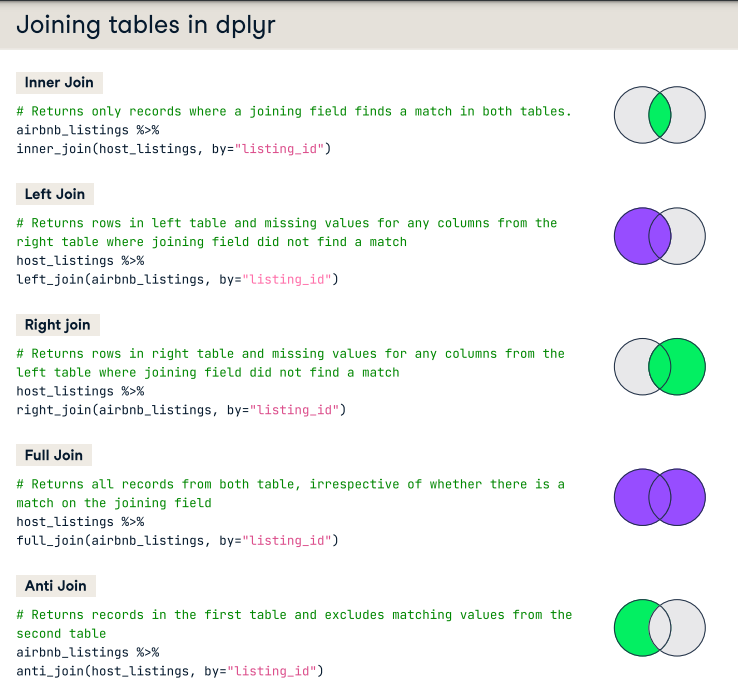
</div>

Import datasets, all part of relational databases

In [522]:
# Stack overflow database
answers <- readRDS("data/answers.rds")
questions <- readRDS("data/questions.rds")

# LEGO database
inventory_parts <- readRDS("data/inventory_parts.rds")
inventories <- readRDS("data/inventories.rds")
part_categories <- readRDS("data/part_categories.rds")
parts <- readRDS("data/parts.rds")
themes <- readRDS("data/themes.rds")
sets <- readRDS("data/sets.rds")
colors <- readRDS("data/colors.rds")

<a name="toc_54826_6.1"></a>
**6.1 bind_rows**

In [517]:
names(questions)
nrow(questions)

names(answers)
nrow(questions)

[1] "id"            "creation_date" "score"

[1] 294735

[1] "id"            "creation_date" "question_id"   "score"

[1] 294735

In [519]:
# Append datasets
qa <- questions %>%
  bind_rows(answers)

head(qa, 2)
nrow(qa)

id,creation_date,score,question_id
<int>,<date>,<int>,<int>
22557677,2014-03-21,1,NA
22557707,2014-03-21,2,NA


[1] 675378

☝️ We appended the datasets but we cannot know which row is from which dsataset. For this, we need to make some changes beforehand:

In [525]:
qa <-  bind_rows(questions %>% mutate(ds = "questions"), 
                answers %>% mutate(ds = "answers"))

head(qa, 2)

id,creation_date,score,ds,question_id
<int>,<date>,<int>,<chr>,<int>
22557677,2014-03-21,1,questions,NA
22557707,2014-03-21,2,questions,NA


<a name="toc_54826_6.2"></a>
**6.2 inner_join**

First, let's join tables by an ID column that has the same name:

In [414]:
head(inventories, 3)
nrow(inventories)

id,version,set_num
<dbl>,<dbl>,<chr>
1,1,7922-1
3,1,3931-1
4,1,6942-1


[1] 15174

☝️ `set_num` links to the corresponding column in the `sets` table. 

In [415]:
head(sets, 2)
nrow(sets)

set_num,name,year,theme_id
<chr>,<chr>,<dbl>,<dbl>
700.3-1,Medium Gift Set (ABB),1949,365
700.1.1-1,Single 2 x 4 Brick (ABB),1950,371


[1] 4977

In [392]:
invset <- inventories %>%
  inner_join(sets, by = "set_num")

head(invset, 3)
nrow(invset)

id,version,set_num,name,year,theme_id
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
21,1,3474-1,1 x 6 Light Gray Bricks,2000,254
25,1,71012-11,Minnie Mouse,2016,555
26,1,6435-1,Coast Guard HQ,1999,96


[1] 5056

☝️  While we started with 4,977 sets, our joined result now has 5,056. This is because each set can have multiple versions, each of which gets its own inventory item.

In [393]:
invset %>%
  filter(version == 1) %>%
  nrow()

[1] 4976

☝️ If we filter for version 1, We got 4976 instead of 4977. This means there's one set that doesn't have a version 1, which is probably a data quality issue. An inner join keeps an observation only if it has an exact match between the first and the second tables. 

Now, let's join tables by an ID column that has different names:

In [378]:
head(themes, 2)

id,name,parent_id
<dbl>,<chr>,<dbl>
1,Technic,NA
2,Arctic Technic,1


☝️ The `theme_id` column in `sets` links to the `id` column in `themes`. 

In [416]:
setheme <- sets %>%
  inner_join(themes,
             by = c("theme_id" = "id"), 
             suffix = c("_set", "_theme"))

head(setheme, 2)
nrow(setheme)

set_num,name_set,year,theme_id,name_theme,parent_id
<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
700.3-1,Medium Gift Set (ABB),1949,365,System,NA
700.1.1-1,Single 2 x 4 Brick (ABB),1950,371,Supplemental,365


[1] 4977

☝️  Each set has exactly one theme, so the joined table has exactly as many observations as the sets table.

Now, let's join more than two tables at once:
<div>
 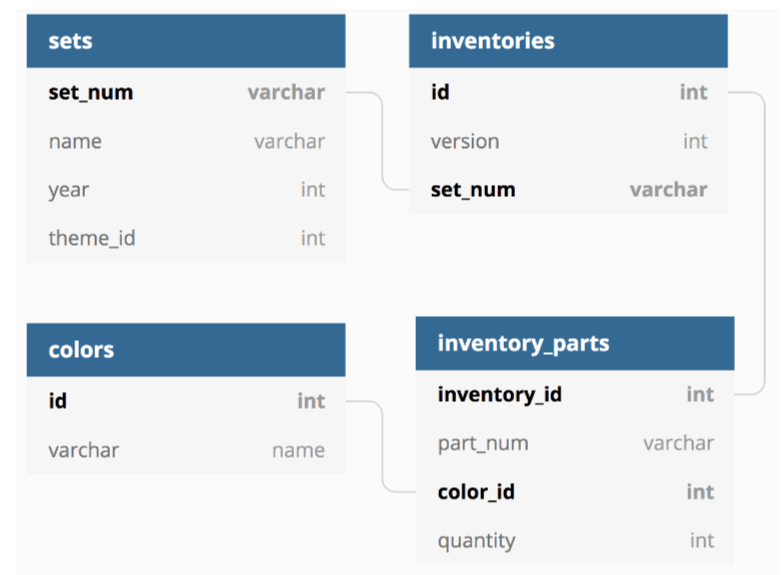
</div>

In [401]:
sets %>%
  inner_join(inventories, by = "set_num") %>%
  inner_join(inventory_parts, by = c("id" = "inventory_id")) %>%
  inner_join(colors, c("color_id" = "id"), suffix = c("_set", "_color"))  %>%
  head(2)

set_num,name_set,year,theme_id,id,version,part_num,color_id,quantity,name_color,rgb
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
700.3-1,Medium Gift Set (ABB),1949,365,24197,1,bdoor01,2,2,Green,#237841
700.3-1,Medium Gift Set (ABB),1949,365,24197,1,bdoor01,15,1,White,#FFFFFF


<a name="toc_54826_6.3"></a>
**6.3 right_join**

In [404]:
# Prepare data
inventory_parts_joines <- inventories %>%
  inner_join(inventory_parts, by = c("id" = "inventory_id")) %>%
  select(-id, -version) %>%
  arrange(desc(quantity))

batmobile <- inventory_parts_joines %>%
  filter(set_num == "7784-1") %>%
  select(-set_num)

batwing <- inventory_parts_joines %>%
  filter(set_num == "70916-1") %>%
  select(-set_num)

In [418]:
# join datasets by multiple columns using inner_join

innerbat <- batmobile %>%
  inner_join(batwing, by = c("part_num", "color_id"), suffix = c("_mobile", "_wing"))

head(innerbat, 2)
nrow(innerbat)

part_num,color_id,quantity_mobile,quantity_wing
<chr>,<dbl>,<dbl>,<dbl>
2780,0,28,17
50950,0,28,2


[1] 45

☝️ This shows that the first part appears 28 times in the Batmobile set, but only 17 times in the Batwing set. This dataset only contains parts that were in both sets.

Now, we want to keep parts that were in the Batmobile but not the Batwing. An `inner_join()` keeps only observations that appear in both tables. But if you want to keep all the observations in one of the tables, you can use a different dplyr verb: `left_join()`. 

In [417]:
# join datasets by multiple columns using left_join

leftbat <- batmobile %>%
  left_join(batwing, by = c("part_num", "color_id"), suffix = c("_mobile", "_wing"))

head(leftbat, 2)
nrow(leftbat)

part_num,color_id,quantity_mobile,quantity_wing
<chr>,<dbl>,<dbl>,<dbl>
3023,72,62,NA
2780,0,28,17


[1] 173

☝️ Notice that the quantity batwing column now has NAs in it, representing missing values. For instance, the first piece, with part num 3023 and color id 72, appears 62 times in the Batmobile but never appears in the Batwing. The number of rows was 45 with `inner_join` but now it is 173 with `left_join`.

<a name="toc_54826_6.4"></a>
**6.4 right_join**

In [476]:
# join datasets by multiple columns using left_join

rigthbat <- batmobile %>%
  right_join(batwing, by = c("part_num", "color_id"), suffix = c("_mobile", "_wing")) 

rigthbat %>%
  filter(is.na(quantity_mobile)) %>%
  head(1)

nrow(rigthbat)

part_num,color_id,quantity_mobile,quantity_wing
<chr>,<dbl>,<dbl>,<dbl>
3023,0,NA,22


[1] 312

☝️ Notice that now the batmobile quantity column has NAs. We can replace the NA values with something else if we want.

In [433]:
#Replace NAs with 0
rigthbat %>%
  replace_na(list(quantity_mobile = 0)) %>%
  filter(part_num == "3023") %>%
  head(1)

part_num,color_id,quantity_mobile,quantity_wing
<chr>,<dbl>,<dbl>,<dbl>
3023,0,0,22


<a name="toc_54826_6.5"></a>
**6.5 Full join**

In [485]:
fullbat <- batmobile %>%
  full_join(batwing, by = c("part_num", "color_id"), suffix = c("_mobile", "_wing"))

nrow(fullbat)

[1] 440

☝️ We have more rows than either of the tables originally. This new table contains all rows that in either ot the original tables. There may be NAs in either quantity columns.

<a name="toc_54826_6.6"></a>
**6.6 Semi join**

In [494]:
names(batmobile)
nrow(batmobile)

[1] "part_num" "color_id" "quantity"

[1] 173

In [492]:
semibat <- batmobile %>%
  semi_join(batwing, by = c("color_id", "part_num"))

head(semibat, 3)
nrow(semibat)

part_num,color_id,quantity
<chr>,<dbl>,<dbl>
2780,0,28
50950,0,28
3004,71,26


[1] 45

☝️ This is a filtered batmobile dataset (no more or less columns) that only contain rows that are **also** in the batwing dataset.

<a name="toc_54826_6.7"></a>
**6.7 Anti join**

In [491]:
antibat <- batmobile %>%
  anti_join(batwing, by = c("color_id", "part_num"))

head(antibat, 3)
nrow(antibat)

part_num,color_id,quantity
<chr>,<dbl>,<dbl>
3023,72,62
3010,0,21
30363,0,21


[1] 128

☝️ This is a filtered batmobile dataset that only contain rows that are **not** in the batwing dataset.

<a name="toc_54826_6.8"></a>
**6.8 Joining tables to themselves**

The `themes` dataset is a hierarchical dataset. These datasets often contain a **parent_id** column  to represent this hierarchical relationship.

In [437]:
head(themes, 10)

id,name,parent_id
<dbl>,<chr>,<dbl>
1,Technic,NA
2,Arctic Technic,1
3,Competition,1
4,Expert Builder,1
5,Model,1
6,Airport,5
7,Construction,5
8,Farm,5
9,Fire,5


☝️ The themes "Arctic Technic", "Competition", "Expert Builder", and "Model" all have the parent id 1. Based on the first id column, we can see that that ID corresponds to the first theme, called "Technic". We can also see that the next five rows have the parent id 5, which we can see corresponds to the theme "Model".

This means that the Technic theme has four children, and its child theme Model also has five children themes:
<div>
 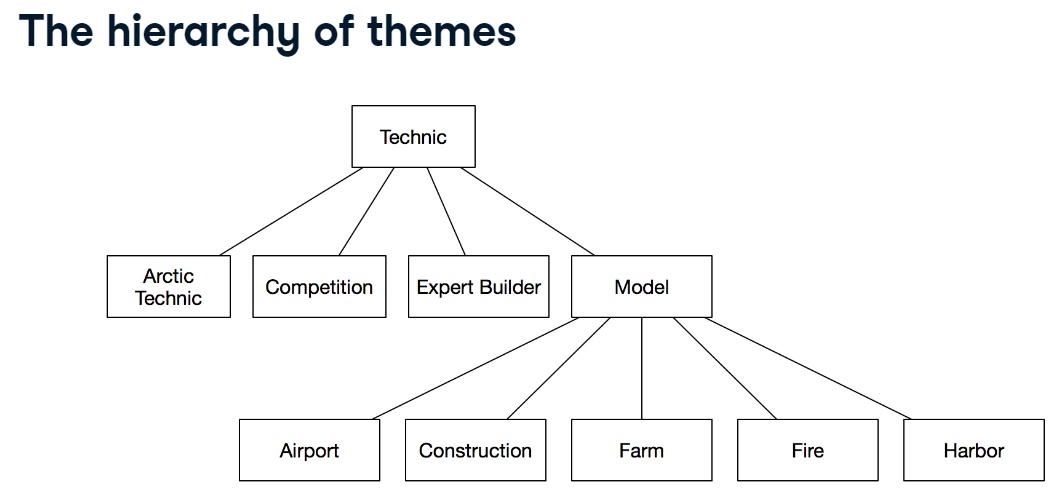
</div>

Sometimes it may be necessary to join a table to itself, by matching each theme to its parents.

In [444]:
# Child-parent table
cptheme <- themes %>%
  inner_join(themes, by = c("parent_id" = "id"), suffix = c("_child", "_parent")) 

head(cptheme, 6)

id,name_child,parent_id,name_parent,parent_id_parent
<dbl>,<chr>,<dbl>,<chr>,<dbl>
2,Arctic Technic,1,Technic,NA
3,Competition,1,Technic,NA
4,Expert Builder,1,Technic,NA
5,Model,1,Technic,NA
6,Airport,5,Model,1
7,Construction,5,Model,1


In [449]:
cptheme %>%
  filter(name_parent == "The Lord of the Rings")

id,name_child,parent_id,name_parent,parent_id_parent
<dbl>,<chr>,<dbl>,<chr>,<dbl>
567,The Fellowship of the Ring,566,The Lord of the Rings,561
568,The Two Towers,566,The Lord of the Rings,561
569,The Return of the King,566,The Lord of the Rings,561


☝️  The "The Lord of the Rings" parent category (566) has am even higher parent category (561), called "The Hobbit and Lord of the Rings"

In [455]:
themes %>%
  filter(id == 561) 

cptheme %>%
  filter(name_parent == "The Hobbit and Lord of the Rings") 

cptheme %>%
  filter(parent_id_parent == 561) 

id,name,parent_id
<dbl>,<chr>,<dbl>
561,The Hobbit and Lord of the Rings,NA


id,name_child,parent_id,name_parent,parent_id_parent
<dbl>,<chr>,<dbl>,<chr>,<dbl>
562,The Hobbit,561,The Hobbit and Lord of the Rings,NA
566,The Lord of the Rings,561,The Hobbit and Lord of the Rings,NA


id,name_child,parent_id,name_parent,parent_id_parent
<dbl>,<chr>,<dbl>,<chr>,<dbl>
563,An Unexpected Journey,562,The Hobbit,561
564,The Desolation of Smaug,562,The Hobbit,561
565,The Battle of the Five Armies,562,The Hobbit,561
567,The Fellowship of the Ring,566,The Lord of the Rings,561
568,The Two Towers,566,The Lord of the Rings,561
569,The Return of the King,566,The Lord of the Rings,561


In [460]:
# Grandparent-grandchild relationships

themes %>% 
  inner_join(themes, by = c("id" = "parent_id"), suffix = c("_parent", "_child")) %>%
  inner_join(themes, by = c("id_child" = "parent_id"), suffix = c("_parent", "_grandchild")) %>%
  filter(name_parent == "The Hobbit and Lord of the Rings") 

id_parent,name_parent,parent_id,id_child,name_child,id_grandchild,name
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
561,The Hobbit and Lord of the Rings,NA,562,The Hobbit,563,An Unexpected Journey
561,The Hobbit and Lord of the Rings,NA,562,The Hobbit,564,The Desolation of Smaug
561,The Hobbit and Lord of the Rings,NA,562,The Hobbit,565,The Battle of the Five Armies
561,The Hobbit and Lord of the Rings,NA,566,The Lord of the Rings,567,The Fellowship of the Ring
561,The Hobbit and Lord of the Rings,NA,566,The Lord of the Rings,568,The Two Towers
561,The Hobbit and Lord of the Rings,NA,566,The Lord of the Rings,569,The Return of the King


In [470]:
# Use left_join to find themes that do not have any child themes.
nochtheme <- themes %>% 
  left_join(themes, by = c("id" = "parent_id"), suffix = c("_parent", "_child")) %>%
  filter(is.na(id_child))

head(nochtheme, 3)
nrow(nochtheme)  

id,name_parent,parent_id,id_child,name_child
<dbl>,<chr>,<dbl>,<dbl>,<chr>
2,Arctic Technic,1,NA,NA
3,Competition,1,NA,NA
4,Expert Builder,1,NA,NA


[1] 586

<a name="toc_54826_6.9"></a>
**6.9 Visualizing set differences**

In [499]:
batmobile_color <- batmobile %>%
  group_by(color_id) %>%
  summarize(total = sum(quantity))

batwing_color <- batwing  %>%
  group_by(color_id) %>%
  summarize(total = sum(quantity))

In [506]:
colors_joined <- batmobile_color %>%
  full_join(batwing_color, by = "color_id", suffix = c("_mobile", "_wing")) %>%
  replace_na(list(total_mobile = 0, total_wing = 0)) %>%
  inner_join(colors, by = c("color_id" = "id")) %>%
  mutate(total_mobile = total_mobile / sum(total_mobile), # create fractions
         total_wing = total_wing / sum(total_wing),
         difference = total_mobile - total_wing  # calculate difference
         )

head(colors_joined, 3)

color_id,total_mobile,total_wing,name,rgb,difference
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
0,0.51615970,0.39733840,Black,#05131D,0.11882129
1,0.03136882,0.04277567,Blue,#0055BF,-0.01140684
4,0.01520913,0.07699620,Red,#C91A09,-0.06178707


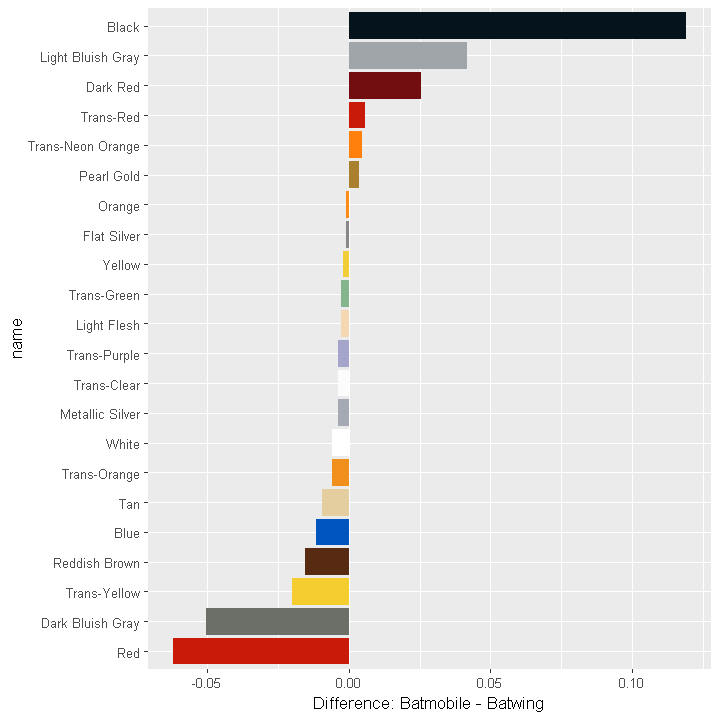

In [509]:
# Visualize

color_palette <- setNames(colors_joined$rgb, colors_joined$name)

colors_joined %>%
  mutate(name = fct_reorder(name, difference)) %>%
  ggplot(aes(name, difference, fill = name)) +
  geom_col() +
  coord_flip() +
  scale_fill_manual(values = color_palette, guide = "none") +
  labs(y = "Difference: Batmobile - Batwing")

☝️ Interpretation:
- The bars on the right, like Black and Light Bluish Gray, have positive differences, meaning they're more common in the batmobile set. 
- The colors on the left, like Red and Dark Bluish Gray, are more common in the Batwing. 

In [163]:
usa %>%
  transmute(state, county, fraction_men = men / population) %>%
  head(2)

state,county,fraction_men
<chr>,<chr>,<dbl>
Alabama,Autauga,0.4843266
Alabama,Baldwin,0.4884866


<a name="toc_54826_7"></a>
## 7.   magrittr pipeable operator replacements

We can make R more pipe friendly with the below functions.

| Base R | magrittr |
|--|-----|
|`x * y` |`x %>% multiply_by(y)`|
|`x ^ y` |`x %>% raise_to_power(y)`|
|`x[y]` |`x %>% extract(y)`|


In [12]:
c(1, 2, 3, 4) %>%
  multiply_by(2)

c(5, 1, 6, 3) %>%
  extract(3)

[1] 2 4 6 8

[1] 6